<a href="https://colab.research.google.com/github/estortega/project_4/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import files
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay

uploaded = files.upload()

import pandas as pd
df = pd.read_csv("creditcard_sample.csv")

df.head()

Saving creditcard_sample.csv to creditcard_sample (6).csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [28]:
# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [29]:
# Build pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3992    1]
 [   2    5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3993
           1       0.83      0.71      0.77         7

    accuracy                           1.00      4000
   macro avg       0.92      0.86      0.88      4000
weighted avg       1.00      1.00      1.00      4000



##Evaluate Fraud Detection Model

Text(0.5, 1.0, 'Confusion Matrix')

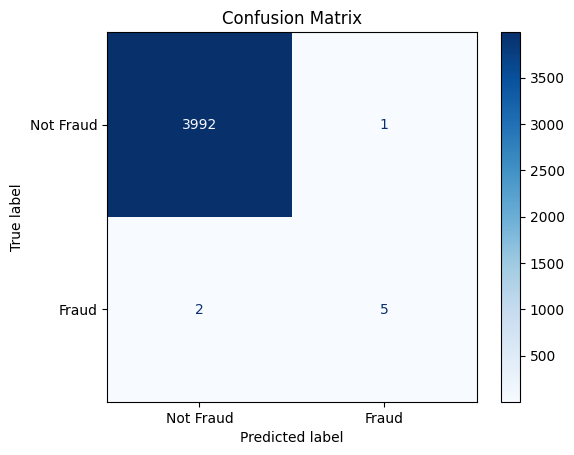

In [31]:
disp = ConfusionMatrixDisplay.from_estimator(
    pipeline, X_test, y_test,
    display_labels=["Not Fraud", "Fraud"],
    cmap="Blues"
)
disp.ax_.set_title("Confusion Matrix")

[[3992    1]
 [   2    5]]
              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996      3993
           1     0.8333    0.7143    0.7692         7

    accuracy                         0.9992      4000
   macro avg     0.9164    0.8570    0.8844      4000
weighted avg     0.9992    0.9992    0.9992      4000



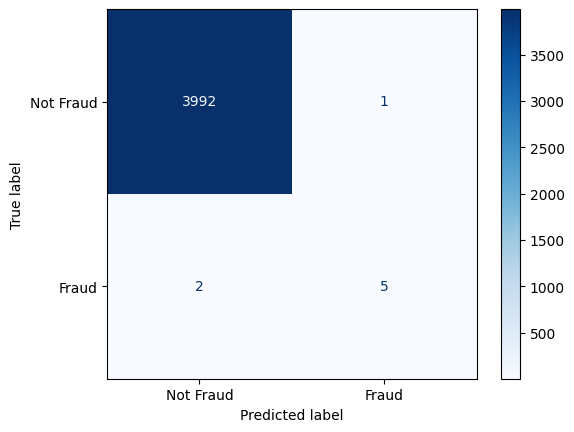

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=["Not Fraud", "Fraud"], cmap="Blues")